In [3]:
import psycopg2
import pandas as pd
import config
from matplotlib import pylab as plt
import seaborn as sns
import numpy as np

color_palette = sns.color_palette(palette='muted', n_colors=None, desat=.75)
sns.set(context='notebook', palette=color_palette, style='whitegrid', font='sans-serif', font_scale=1.5, color_codes=False, rc=None)

%matplotlib inline

In [6]:
conn = None
try:
    # read connection parameters
    params = config.cfgAzureS17()
    
    paramsS03 = config.cfgAzureS03()

    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    conn = psycopg2.connect(**params)
    
    connS03 = psycopg2.connect(**paramsS03)

    # create a cursor
    cur = conn.cursor()

    # execute a statement
    print('PostgreSQL database version:')
    cur.execute('SELECT version()')

    # display the PostgreSQL database server version
    db_version = cur.fetchone()
    print(db_version)

    # close the communication with the PostgreSQL
    cur.close()

except (Exception, psycopg2.DatabaseError) as error:
    print(error)

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)


In [7]:
tweets = pd.read_sql_query("SELECT * FROM tweets_info;", conn, parse_dates=['created_at'] )
tweets['created_at'] = tweets['created_at'].dt.tz_localize("UTC").dt.tz_convert("Europe/Berlin")

print("Number of Tweets: %s" %len(tweets))
tweets.head()

Number of Tweets: 112003


,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
0,988175614908788736,1647758059,Johangeorgenstadt 23:59 Nachtzeit/Trocken/Klar...,2018-04-23 00:00:00+02:00,"<a href=""http://saratoga-weather.org/scripts-T...",de,False,False,NaN,False,...,0,False,False,wetter,None,0,False,None,NaN,NaN
1,988175619098861568,234778734,Beim nächsten Ton ist es 0 Uhr: ♩♩♩,2018-04-23 00:00:01+02:00,"<a href=""http://www.rasputin.de/"" rel=""nofollo...",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
2,988175627453952002,821834588158853120,[d] DiplIngMarkus Verbrauch gestern: 3.71 kW...,2018-04-23 00:00:03+02:00,"<a href=""http://arduino-tweet.appspot.com/"" re...",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
3,988175627479146498,859148218915069952,Alien Mutterschiff sozusagen \n(Hab das Gefühl...,2018-04-23 00:00:03+02:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
4,988175681996681218,3206249890,@MDegen55 🇩🇪🇩🇪 Gute Nacht 🌃🌃🌃 https://t.co/OTn...,2018-04-23 00:00:16+02:00,"<a href=""http://twitter.com/download/android"" ...",de,False,False,NaN,False,...,0,False,False,None,3206249890,0,False,None,NaN,NaN


In [8]:
len(tweets[tweets['extracted'] == False ])

86123

In [9]:
tweetsS03 = pd.read_sql_query("SELECT * FROM tweets_info;", connS03, parse_dates=['created_at'] )
tweetsS03['created_at'] = tweetsS03['created_at'].dt.tz_localize("UTC").dt.tz_convert("Europe/Berlin")

print("Number of Tweets: %s" %len(tweetsS03))
tweetsS03.head()

Number of Tweets: 123680


,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
0,952676732913401856,1121790578,"Gute Nacht von allen von Ihnen, Japan des Anhä...",2018-01-15 00:00:07+01:00,"<a href=""http://autotweety.net"" rel=""nofollow""...",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
1,952676745496354816,824737881763745792,William Haubrich - Legend - Photograph Gregory...,2018-01-15 00:00:10+01:00,"<a href=""http://instagram.com"" rel=""nofollow"">...",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
2,952676758066737158,16947788,U13-Cup in Wermelskirchen: Einmal kicken gegen...,2018-01-15 00:00:13+01:00,"<a href=""http://www.rp-online.de"" rel=""nofollo...",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
3,952676758066728960,950898579735851008,Tochter meiner Freundin vernascht https://t.co...,2018-01-15 00:00:13+01:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",de,False,False,NaN,False,...,0,False,False,None,None,1,False,None,NaN,NaN
4,952676770679058432,900374406190518272,Meine frau wird fremdgefickt iv clip1\n#milf #...,2018-01-15 00:00:16+01:00,"<a href=""http://luxviral.com"" rel=""nofollow"">t...",de,False,False,NaN,False,...,0,False,False,milf porno ass HDvideos SoloMale HDвидео,None,1,False,None,NaN,NaN


In [10]:
len(tweetsS03[tweetsS03['extracted'] == False ])

95300

In [12]:
#dates_values = tweets['created_at'][(tweets['created_at'].dt.day == 23) & (tweets['extracted'] == False) & (tweets['created_at'].dt.year == 2018) & ((tweets['created_at'].dt.week == 17) | (tweets['created_at'].dt.week == 16))].value_counts()
#dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 7 )].value_counts()
week_s03 = tweetsS03['created_at'][(tweetsS03['extracted'] == False)].value_counts()
week_s17 = tweets['created_at'][(tweets['extracted'] == False)].value_counts()

print(week_s03.resample("D").sum().values)
print(week_s17.resample("D").sum().values)
plt.figure(figsize=(16,6))
#fig, ax = plt.subplots()

days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

data = {'day': days,'Calendar Week 03':week_s03.resample("D").sum().values, 'Calendar Week 17': week_s17.resample("D").sum().values}
df_days_stats = pd.DataFrame(data=data)

print(df_days_stats['Calendar Week 03'].sum())
print(df_days_stats['Calendar Week 17'].sum())

df_days_stats

[13344 13455 13782 13906 13363 12863 14587]
[12530 12730 13352 12539 12322 11284 11366]
95300
86123


,Calendar Week 03,Calendar Week 17,day
0,13344,12530,monday
1,13455,12730,tuesday
2,13782,13352,wednesday
3,13906,12539,thursday
4,13363,12322,friday
5,12863,11284,saturday
6,14587,11366,sunday


[13344 13455 13782 13906 13363 12863 14587]
[12530 12730 13352 12539 12322 11284 11366]
[13344 13455 13782 13906 13363 12863 14587 12530 12730 13352 12539 12322
 11284 11366]
['cw 03', 'cw 03', 'cw 03', 'cw 03', 'cw 03', 'cw 03', 'cw 03', 'cw 17', 'cw 17', 'cw 17', 'cw 17', 'cw 17', 'cw 17', 'cw 17']
['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']


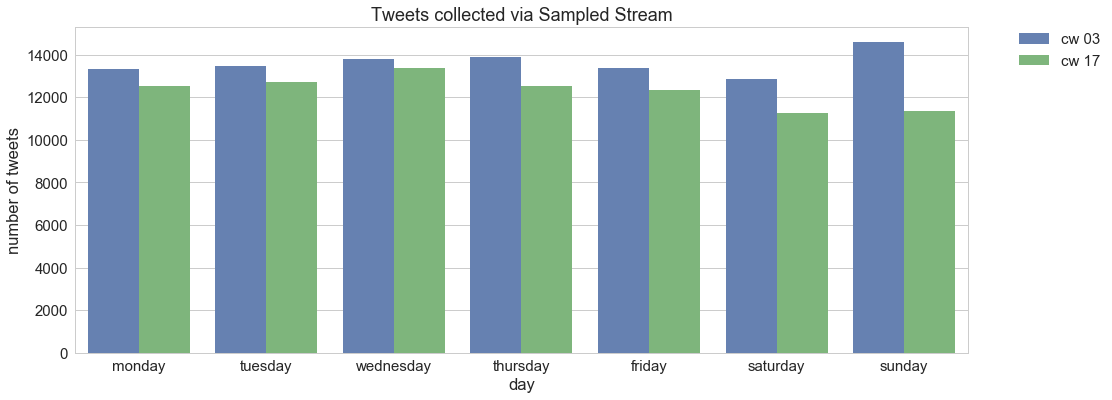

In [13]:
#dates_values = tweets['created_at'][(tweets['created_at'].dt.day == 23) & (tweets['extracted'] == False) & (tweets['created_at'].dt.year == 2018) & ((tweets['created_at'].dt.week == 17) | (tweets['created_at'].dt.week == 16))].value_counts()
#dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 7 )].value_counts()
week_s03 = tweetsS03['created_at'][(tweetsS03['extracted'] == False)].value_counts()
week_s17 = tweets['created_at'][(tweets['extracted'] == False)].value_counts()

print(week_s03.resample("D").sum().values)
print(week_s17.resample("D").sum().values)
plt.figure(figsize=(16,6))
#fig, ax = plt.subplots()



concat_values = np.concatenate([week_s03.resample("D").sum().values, week_s17.resample("D").sum().values])
concat_types = 7 * ["cw 03"] + 7 * ["cw 17"]
concat_days = 2 * ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
print(concat_values)
print(concat_types)
print(concat_days)

data = {'day': concat_days,'number of tweets':concat_values, 'calendar week': concat_types}
df_days_stats = pd.DataFrame(data=data)

df_days_stats
ax = sns.barplot(x="day", y="number of tweets", hue="calendar week", data=df_days_stats)
ax.set_title("Tweets collected via Sampled Stream")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("streaming_stats/sampled-count-by-day.png", transparent=True)


[95300]
[86123]
[95300 86123]
['03', '17']


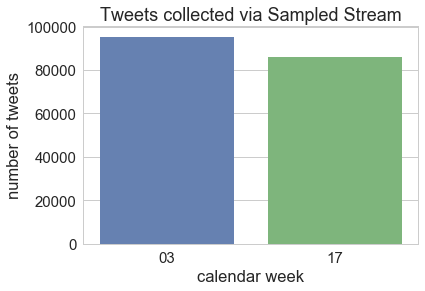

In [14]:
#dates_values = tweets['created_at'][(tweets['created_at'].dt.day == 23) & (tweets['extracted'] == False) & (tweets['created_at'].dt.year == 2018) & ((tweets['created_at'].dt.week == 17) | (tweets['created_at'].dt.week == 16))].value_counts()
#dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 7 )].value_counts()
week_s03 = tweetsS03['created_at'][(tweetsS03['extracted'] == False)].value_counts()
week_s17 = tweets['created_at'][(tweets['extracted'] == False)].value_counts()

print(week_s03.resample("W").sum().values)
print(week_s17.resample("W").sum().values)
#plt.figure(figsize=(16,6))
#fig, ax = plt.subplots()



concat_values = np.concatenate([week_s03.resample("W").sum().values, week_s17.resample("W").sum().values])
concat_weeks = ["03"] + ["17"]
print(concat_values)
print(concat_weeks)

data = {'number of tweets':concat_values, 'calendar week': concat_weeks}
df_week_stats = pd.DataFrame(data=data)

df_days_stats
ax = sns.barplot(x="calendar week", y="number of tweets", data=df_week_stats)
ax.set_title("Tweets collected via Sampled Stream")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("streaming_stats/sampled-count-by-week.png", transparent=True)

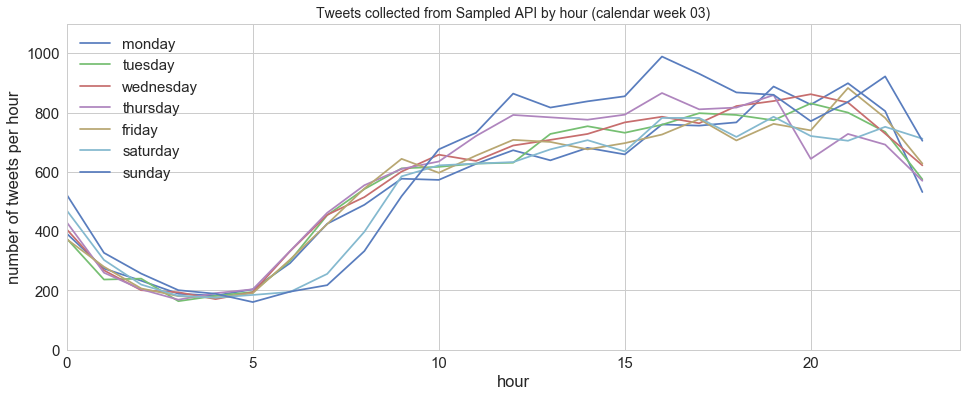

In [74]:
#dates_values = tweets['created_at'][(tweets['created_at'].dt.day == 23) & (tweets['extracted'] == False) & (tweets['created_at'].dt.year == 2018) & ((tweets['created_at'].dt.week == 17) | (tweets['created_at'].dt.week == 16))].value_counts()
#dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 7 )].value_counts()
dates_values15_s03 = tweetsS03['created_at'][(tweetsS03['created_at'].dt.day == 15) & (tweetsS03['created_at'].dt.year == 2018) & (tweetsS03['created_at'].dt.month == 1) & (tweetsS03['extracted'] == False)].value_counts()
dates_values16_s03 = tweetsS03['created_at'][(tweetsS03['created_at'].dt.day == 16) & (tweetsS03['created_at'].dt.year == 2018) & (tweetsS03['created_at'].dt.month == 1) & (tweetsS03['extracted'] == False)].value_counts()
dates_values17_s03 = tweetsS03['created_at'][(tweetsS03['created_at'].dt.day == 17) & (tweetsS03['created_at'].dt.year == 2018) & (tweetsS03['created_at'].dt.month == 1) & (tweetsS03['extracted'] == False)].value_counts()
dates_values18_s03 = tweetsS03['created_at'][(tweetsS03['created_at'].dt.day == 18) & (tweetsS03['created_at'].dt.year == 2018) & (tweetsS03['created_at'].dt.month == 1) & (tweetsS03['extracted'] == False)].value_counts()
dates_values19_s03 = tweetsS03['created_at'][(tweetsS03['created_at'].dt.day == 19) & (tweetsS03['created_at'].dt.year == 2018) & (tweetsS03['created_at'].dt.month == 1) & (tweetsS03['extracted'] == False)].value_counts()
dates_values20_s03 = tweetsS03['created_at'][(tweetsS03['created_at'].dt.day == 20) & (tweetsS03['created_at'].dt.year == 2018) & (tweetsS03['created_at'].dt.month == 1) & (tweetsS03['extracted'] == False)].value_counts()
dates_values21_s03 = tweetsS03['created_at'][(tweetsS03['created_at'].dt.day == 21) & (tweetsS03['created_at'].dt.year == 2018) & (tweetsS03['created_at'].dt.month == 1) & (tweetsS03['extracted'] == False)].value_counts()

plt.figure(figsize=(16,6))
plt.plot(dates_values15_s03.resample('h').sum().values, label="monday")
plt.plot(dates_values16_s03.resample('h').sum().values, label="tuesday")
plt.plot(dates_values17_s03.resample('h').sum().values, label="wednesday")
plt.plot(dates_values18_s03.resample('h').sum().values, label="thursday")
plt.plot(dates_values19_s03.resample('h').sum().values, label="friday")
plt.plot(dates_values20_s03.resample('h').sum().values, label="saturday")
plt.plot(dates_values21_s03.resample('h').sum().values, label="sunday")

plt.legend()
plt.title('Tweets collected from Sampled API by hour (calendar week 03)', fontsize=14)
plt.ylabel('number of tweets per hour')
plt.xlabel('hour')
plt.axis([0, 24, 0, 1100])
#plt.show()
plt.savefig("streaming_stats/s03-by-hour.png", transparent=True)
#dates_values.resample('D').mean().plot(figsize=(16,6))
#dates_values23.resample('h').sum().plot(figsize=(16,6))
#dates_values24.resample('h').sum().plot(figsize=(16,6))

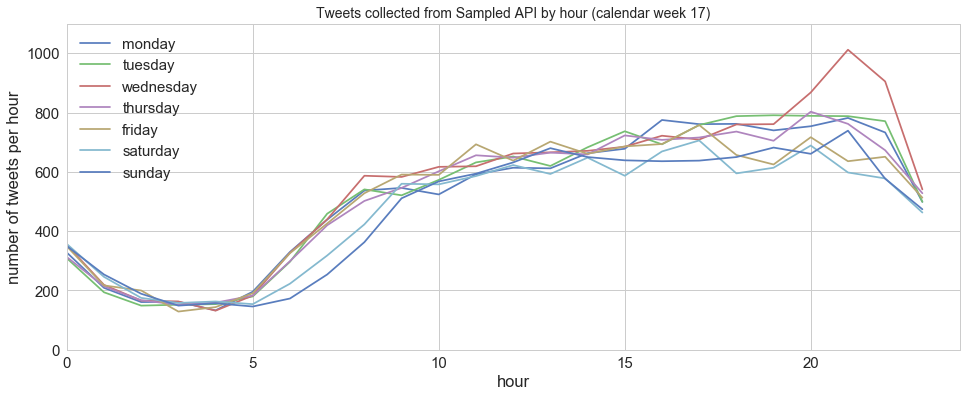

In [75]:
#dates_values = tweets['created_at'][(tweets['created_at'].dt.day == 23) & (tweets['extracted'] == False) & (tweets['created_at'].dt.year == 2018) & ((tweets['created_at'].dt.week == 17) | (tweets['created_at'].dt.week == 16))].value_counts()
#dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 7 )].value_counts()
dates_values23_s17 = tweets['created_at'][(tweets['created_at'].dt.day == 23) & (tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.month == 4) & (tweets['extracted'] == False)].value_counts()
dates_values24_s17 = tweets['created_at'][(tweets['created_at'].dt.day == 24) & (tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.month == 4) & (tweets['extracted'] == False)].value_counts()
dates_values25_s17 = tweets['created_at'][(tweets['created_at'].dt.day == 25) & (tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.month == 4) & (tweets['extracted'] == False)].value_counts()
dates_values26_s17 = tweets['created_at'][(tweets['created_at'].dt.day == 26) & (tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.month == 4) & (tweets['extracted'] == False)].value_counts()
dates_values27_s17 = tweets['created_at'][(tweets['created_at'].dt.day == 27) & (tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.month == 4) & (tweets['extracted'] == False)].value_counts()
dates_values28_s17 = tweets['created_at'][(tweets['created_at'].dt.day == 28) & (tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.month == 4) & (tweets['extracted'] == False)].value_counts()
dates_values29_s17 = tweets['created_at'][(tweets['created_at'].dt.day == 29) & (tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.month == 4) & (tweets['extracted'] == False)].value_counts()

plt.figure(figsize=(16,6))
plt.plot(dates_values23_s17.resample('h').sum().values, label="monday")
plt.plot(dates_values24_s17.resample('h').sum().values, label="tuesday")
plt.plot(dates_values25_s17.resample('h').sum().values, label="wednesday")
plt.plot(dates_values26_s17.resample('h').sum().values, label="thursday")
plt.plot(dates_values27_s17.resample('h').sum().values, label="friday")
plt.plot(dates_values28_s17.resample('h').sum().values, label="saturday")
plt.plot(dates_values29_s17.resample('h').sum().values, label="sunday")

plt.legend()
plt.title('Tweets collected from Sampled API by hour (calendar week 17)', fontsize=14)
plt.ylabel('number of tweets per hour')
plt.xlabel('hour')
plt.axis([0, 24, 0, 1100])
#plt.show()
plt.savefig("streaming_stats/s17-by-hour.png", transparent=True)
#dates_values.resample('D').mean().plot(figsize=(16,6))
#dates_values23.resample('h').sum().plot(figsize=(16,6))
#dates_values24.resample('h').sum().plot(figsize=(16,6))

In [76]:
print(dates_values23_s17.resample('h').sum().values)
print(dates_values15_s03.resample('h').sum().values)
print((dates_values23_s17.resample('h').sum().values + dates_values15_s03.resample('h').sum().values) / 2)

[328 209 161 162 133 196 330 439 537 546 524 592 614 612 663 678 775 761
 762 740 754 782 733 499]
[392 274 233 189 183 204 292 425 489 577 573 627 673 639 681 659 760 756
 767 888 827 899 805 532]
[360.  241.5 197.  175.5 158.  200.  311.  432.  513.  561.5 548.5 609.5
 643.5 625.5 672.  668.5 767.5 758.5 764.5 814.  790.5 840.5 769.  515.5]


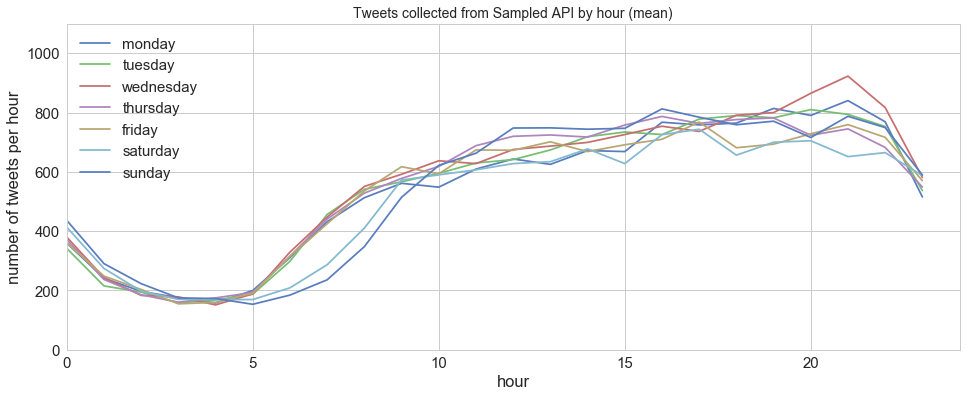

In [77]:
#dates_values = tweets['created_at'][(tweets['created_at'].dt.day == 23) & (tweets['extracted'] == False) & (tweets['created_at'].dt.year == 2018) & ((tweets['created_at'].dt.week == 17) | (tweets['created_at'].dt.week == 16))].value_counts()
#dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 7 )].value_counts()
plt.figure(figsize=(16,6))
plt.plot((dates_values23_s17.resample('h').sum().values + dates_values15_s03.resample('h').sum().values) / 2, label="monday")
plt.plot((dates_values24_s17.resample('h').sum().values + dates_values16_s03.resample('h').sum().values) / 2, label="tuesday")
plt.plot((dates_values25_s17.resample('h').sum().values + dates_values17_s03.resample('h').sum().values) / 2, label="wednesday")
plt.plot((dates_values26_s17.resample('h').sum().values + dates_values18_s03.resample('h').sum().values) / 2, label="thursday")
plt.plot((dates_values27_s17.resample('h').sum().values + dates_values19_s03.resample('h').sum().values) / 2, label="friday")
plt.plot((dates_values28_s17.resample('h').sum().values + dates_values20_s03.resample('h').sum().values) / 2, label="saturday")
plt.plot((dates_values29_s17.resample('h').sum().values + dates_values21_s03.resample('h').sum().values) / 2, label="sunday")

plt.legend()
plt.title('Tweets collected from Sampled API by hour (mean)', fontsize=14)
plt.ylabel('number of tweets per hour')
plt.xlabel('hour')
plt.axis([0, 24, 0, 1100])
#plt.show()
plt.savefig("streaming_stats/sampled-by-hour-mean.png", transparent=True)
#dates_values.resample('D').mean().plot(figsize=(16,6))
#dates_values23.resample('h').sum().plot(figsize=(16,6))
#dates_values24.resample('h').sum().plot(figsize=(16,6))

No handles with labels found to put in legend.


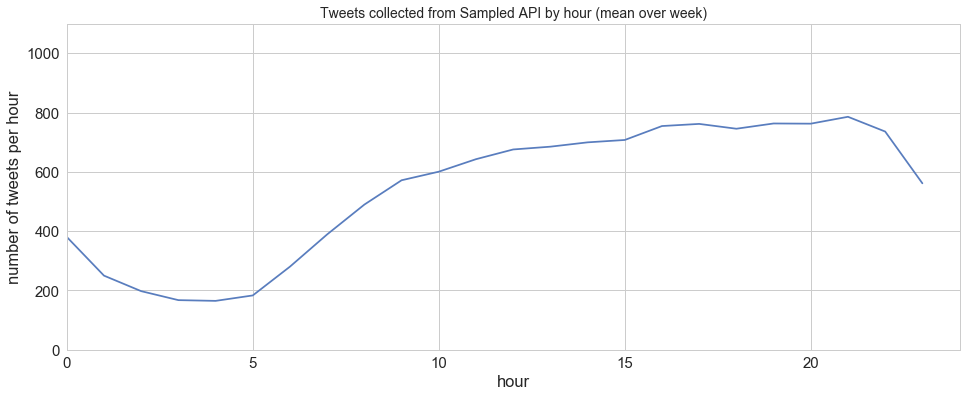

In [78]:
#dates_values = tweets['created_at'][(tweets['created_at'].dt.day == 23) & (tweets['extracted'] == False) & (tweets['created_at'].dt.year == 2018) & ((tweets['created_at'].dt.week == 17) | (tweets['created_at'].dt.week == 16))].value_counts()
#dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 7 )].value_counts()
plt.figure(figsize=(16,6))
date1_s = (dates_values23_s17.resample('h').sum().values + dates_values15_s03.resample('h').sum().values) / 2
date2_s = (dates_values24_s17.resample('h').sum().values + dates_values16_s03.resample('h').sum().values) / 2
date3_s = (dates_values25_s17.resample('h').sum().values + dates_values17_s03.resample('h').sum().values) / 2
date4_s = (dates_values26_s17.resample('h').sum().values + dates_values18_s03.resample('h').sum().values) / 2
date5_s = (dates_values27_s17.resample('h').sum().values + dates_values19_s03.resample('h').sum().values) / 2
date6_s = (dates_values28_s17.resample('h').sum().values + dates_values20_s03.resample('h').sum().values) / 2
date7_s = (dates_values29_s17.resample('h').sum().values + dates_values21_s03.resample('h').sum().values) / 2

mean_over_weekdays = (date1_s + date2_s + date3_s + date4_s + date5_s + date6_s + date7_s) / 7

plt.plot(mean_over_weekdays)
plt.legend()
plt.title('Tweets collected from Sampled API by hour (mean over week)', fontsize=14)
plt.ylabel('number of tweets per hour')
plt.xlabel('hour')
plt.axis([0, 24, 0, 1100])

#plt.show()
plt.savefig("streaming_stats/sampled-by-hour-over-week-mean.png", transparent=True)
#dates_values.resample('D').mean().plot(figsize=(16,6))
#dates_values23.resample('h').sum().plot(figsize=(16,6))
#dates_values24.resample('h').sum().plot(figsize=(16,6))

In [79]:
mean_over_weekdays.v

AttributeError: 'numpy.ndarray' object has no attribute 'v'

In [ ]:
tweets['created_at'][(tweets['created_at'].dt.day == 23) & (tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.month == 4)]

In [ ]:
tweets_not_xtracted = tweets[(tweets['extracted'] == False)]
first_sample = tweets[tweets['created_at'].dt.min()]
#tweets_not_xtracted.head()

In [ ]:
dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 17)].value_counts()
#dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 7 )].value_counts()

print(dates_values.resample('D').mean())
dates_values.resample('D').mean().plot(figsize=(16,6))

In [ ]:
dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 17)].value_counts()
#dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 7 )].value_counts()

#print(dates_values.resample('D').mean())

print(dates_values)

In [ ]:
dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 17)].value_counts()
#dates_values = tweets['created_at'][(tweets['created_at'].dt.year == 2018) & (tweets['created_at'].dt.week == 7 )].value_counts()

dates_values.plot(figsize=(16,6))

In [ ]:
tweets['created_at'] = tweets['created_at'].dt.tz_localize("UTC").dt.tz_convert("Europe/Berlin")
tweets.head()

In [ ]:
tweets[tweets['extracted'] == True]